<a href="https://colab.research.google.com/github/xcellentbird/Deep_Learning/blob/main/MNIST_%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83_%EC%BD%9C%EB%B0%B1_%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=45)

In [ ]:
# 함수형 모델 구성
def model_fn(a_layer= None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# verbose를 0으로 하여 훈련 과정을 보여주지 않습니다
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

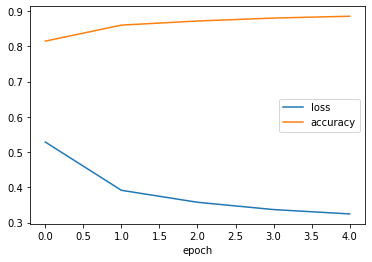

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(history.history.keys())
plt.show()

Epoch를 20으로 늘려서 훈련 시작하면?

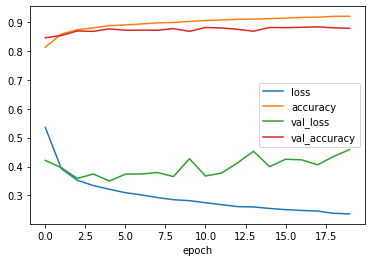

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
fit_score = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

for k in fit_score.history.keys():
  plt.plot(fit_score.history[k])
plt.xlabel('epoch')
plt.legend(fit_score.history)
plt.show()

옵티마이저 Adam 추가!

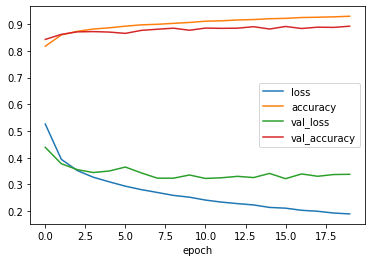

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
fit_score = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

for k in fit_score.history.keys():
  plt.plot(fit_score.history[k])
plt.xlabel('epoch')
plt.legend(fit_score.history)
plt.show()

In [ ]:
이번엔 learning_rate를 반으로 낮춰보자.

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7333 - accuracy: 0.7570 - val_loss: 0.4444 - val_accuracy: 0.8435
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4163 - accuracy: 0.8531 - val_loss: 0.4038 - val_accuracy: 0.8561
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3833 - accuracy: 0.8638 - val_loss: 0.3650 - val_accuracy: 0.8691
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3452 - accuracy: 0.8777 - val_loss: 0.3554 - val_accuracy: 0.8722
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3321 - accuracy: 0.8786 - val_loss: 0.3481 - val_accuracy: 0.8720
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3121 - accuracy: 0.8883 - val_loss: 0.3299 - val_accuracy: 0.8792
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2998 - accuracy: 0.8915 - val_loss: 0.3273 - val_accuracy:

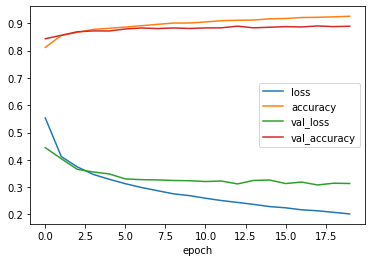

In [ ]:
model = model_fn()
Adam = keras.optimizers.Adam(learning_rate=0.0005)
# loss_func = keras.losses.sparse_categorical_crossentropy(y_true) <- 어떻게 사용하는 걸까??
model.compile(optimizer=Adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
fit_score = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))

for k in fit_score.history.keys():
  plt.plot(fit_score.history[k])
plt.xlabel('epoch')
plt.legend(fit_score.history)
plt.show()

전체 기울기만 달라질 뿐(epoch를 줄이는 효과처럼), 크게 달라진 것은 없다.
그래도 Adam을 써서 과대적합을 줄여냈다.

In [ ]:
# Dropout: 일부 층의 출력을 0으로 만드는 역할을 수행하여, 과대적합을 막아낸다.
# 구글이 2016년에 방어적 특허를 냈다고 한다. 실무에 어떠한 영향이 있을까?
# 은닉층에 드랍아웃 층을 더해 출력의 30%를 0으로 만들었다. -> 100개의 출력 중 30개의 출력을 0으로 만든다는 의미일까?
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


다시 learning_rate를 기본으로 복원하고, epoch는 줄여도 될 것 같다

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7765 - accuracy: 0.7298 - val_loss: 0.4243 - val_accuracy: 0.8431
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4503 - accuracy: 0.8379 - val_loss: 0.4040 - val_accuracy: 0.8501
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4105 - accuracy: 0.8507 - val_loss: 0.3951 - val_accuracy: 0.8506
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3769 - accuracy: 0.8646 - val_loss: 0.3707 - val_accuracy: 0.8613
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3680 - accuracy: 0.8643 - val_loss: 0.3436 - val_accuracy: 0.8712
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3517 - accuracy: 0.8717 - val_loss: 0.3411 - val_accuracy: 0.8749
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3399 - accuracy: 0.8747 - val_loss: 0.3362 - val_accuracy:

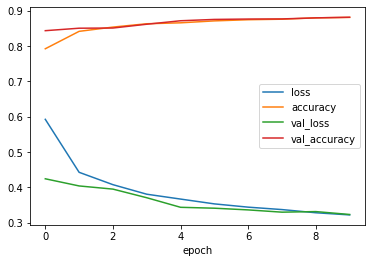

In [ ]:
Adam = keras.optimizers.Adam(learning_rate=0.001)
# loss_func = keras.losses.sparse_categorical_crossentropy(y_true) <- 어떻게 사용하는 걸까??
model.compile(optimizer=Adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
fit_score = model.fit(train_scaled, train_target, epochs=10, verbose=1, validation_data=(val_scaled, val_target))

for k in fit_score.history.keys():
  plt.plot(fit_score.history[k])
plt.xlabel('epoch')
plt.legend(fit_score.history)
plt.show()

!!! 드랍아웃은 과대적합을 막는 데에 큰 효과를 보였다

In [ ]:
# 모델이 학습한 가중치를 저장한다.
# 확장자는 h5(HDF5)
model.save_weights('model-weights.h5')

# ls 커맨드 명령어를 통해 가중치가 정상적으로 저장된 것을 볼 수 있다.
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Mar 26 12:32 model-weights.h5


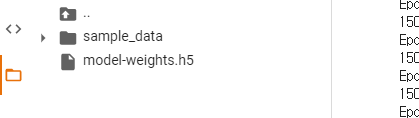

In [ ]:
# 모델과 가중치 모두를 저장한다.
model.save('model-whole.h5')

In [ ]:
model2 = model_fn(keras.layers.Dropout(0.3))
# 이와 같이 fit을 수행하지 않고 저장된 가중치를 불러옴으로서
# 결과를 얻어낼 수 잇다.
model2.load_weights('model-weights.h5')

In [ ]:
import numpy as np
# 검증 데이터를 predict를 통해 각 객체마다 label의 확률값을 출력한다.
predict = model2.predict(val_scaled)

# 12000개의 데이터와 10개의 레이블 확률
print(predict.shape)
print(predict)

# argmax(axis=-1)을 통해 레이블 확률 중 가장 높은 레이블(index로)를 받는다.
# axis = 1이면 열을 따라 각 행의 최댓값의 인덱스를 반환하고
# axis = 0이면 행을 따라 각 열의 최댓값의 인덱스를 반환한다.
val_label = np.argmax(predict, axis=-1)
print(val_label, val_label.shape)
# 실제 타겟 레이블과 추측한 레이블이 같은 것의 평균
print(np.mean(val_label == val_target))

(12000, 10)
[[8.9423018e-11 3.1597037e-13 2.0837304e-16 ... 4.5639116e-04
  3.7762952e-12 9.9899608e-01]
 [8.9036720e-03 6.8123668e-04 2.3262229e-02 ... 8.3664304e-08
  1.2348962e-03 2.5444766e-07]
 [9.9001515e-01 1.7114449e-11 3.7903825e-05 ... 2.6868959e-21
  9.0779889e-10 7.6810512e-20]
 ...
 [1.0529278e-03 4.0083330e-02 1.0739908e-03 ... 5.9777423e-05
  1.2076259e-02 3.6958244e-04]
 [1.2710055e-03 1.0665437e-05 1.8277796e-04 ... 2.2949936e-05
  9.6906161e-01 3.4151974e-08]
 [2.7758530e-05 9.2267194e-10 2.0876304e-07 ... 2.0213612e-08
  9.9996734e-01 1.0103832e-08]]
[9 4 0 ... 3 8 8] (12000,)
0.8810833333333333


In [ ]:
model3 = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8811


[0.3232967257499695, 0.8810833096504211]

이번에는 콜백 기능을 이용해보려고 한다.
이전에 검증 점수가 불안정하던 모델을 가져오겠다.
adam과 dropout층을 사용하지 않는다.

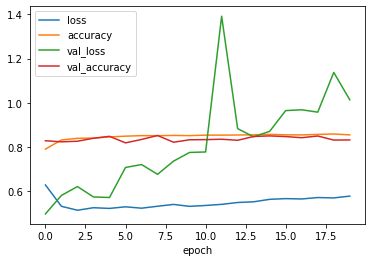

In [64]:
checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5')

model4 = model_fn()
optimizier = keras.optimizers.RMSprop(learning_rate=0.01)
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=optimizier)
fit_score = model4.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint])

for k in fit_score.history.keys():
  plt.plot(fit_score.history[k])
plt.xlabel('epoch')
plt.legend(fit_score.history)
plt.show()

In [65]:
model5 = keras.models.load_model('best_model.h5')
best_score = model5.evaluate(val_scaled, val_target)
val_score = np.array(list(zip(fit_score.history['val_loss'], fit_score.history['val_accuracy'])))

print(best_score)
print(val_score.shape)

375/375 [==============================] - 1s 2ms/step - loss: 1.0130 - accuracy: 0.8315
[1.0130131244659424, 0.8314999938011169]
(20, 2)


In [66]:
for i, score in enumerate(val_score):
  print(score)
  if score[0] == best_score[0] and score[1] == best_score[1]:
    print('best epoch == ', i+1)

[0.49674889 0.82791668]
[0.58045548 0.82291669]
[0.62060267 0.82566667]
[0.57341391 0.83908331]
[0.57104719 0.84783334]
[0.70688349 0.81825   ]
[0.7202298  0.83366668]
[0.67589968 0.85158336]
[0.73565245 0.82116669]
[0.77491611 0.83225   ]
[0.77704704 0.83291668]
[1.39121926 0.83466667]
[0.88266617 0.82991666]
[0.84556609 0.84724998]
[0.87058938 0.84974998]
[0.96430916 0.84675002]
[0.96801007 0.84158331]
[0.95722038 0.84933335]
[1.13699317 0.83091664]
[1.01301312 0.83149999]
best epoch ==  20


In [ ]:
왜 이럴까... 책에서는 콜백은 최상의 검증 점수를 만드는 모델을 저장한다고 되어있는데,

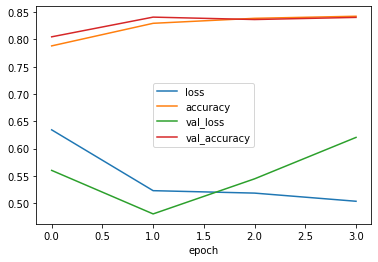

In [67]:
checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5')
# patience는 N번 연속 검증 점수가 향상되지 않으면 훈련을 종료하는 역할, restore_best_wieghts을 True로 하면, 가장 낮은 손실을 낸 모델 파라미터로 되돌린다.
early_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

model4 = model_fn()
optimizier = keras.optimizers.RMSprop(learning_rate=0.01)
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=optimizier)
fit_score = model4.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint, early_stopping])

for k in fit_score.history.keys():
  plt.plot(fit_score.history[k])
plt.xlabel('epoch')
plt.legend(fit_score.history)
plt.show()

In [68]:
model5 = keras.models.load_model('best_model.h5')
best_score = model5.evaluate(val_scaled, val_target)
val_score = np.array(list(zip(fit_score.history['val_loss'], fit_score.history['val_accuracy'])))

print(best_score)
print(val_score.shape)
for i, score in enumerate(val_score):
  print(score)
  if score[0] == best_score[0] and score[1] == best_score[1]:
    print('best epoch == ', i+1)

375/375 [==============================] - 1s 2ms/step - loss: 0.6205 - accuracy: 0.8403
[0.6204771995544434, 0.8402500152587891]
(4, 2)
[0.56006753 0.80466664]
[0.48035601 0.84074998]
[0.54462153 0.83633333]
[0.6204772  0.84025002]
best epoch ==  4
